# HW3: Regression and Classification

In this assignment you will preprocess the dataset and perform some basic regression and classification tasks. The learning outcome of this part is to know how one can pre-process a real-world dataset and perform a supervised learning task, and to understand some of the fundamental mechanisms behind these tasks.

### Student information
Please provide your information for automatic grading.

In [1]:
STUD_SUID = 'lika3203'
STUD_NAME = 'Linn Karlsson'
STUD_EMAIL = 'lika3203@student.su.se'

##  Grading: 

Pass/Fail.

To Pass this HW you need to provide a complete and correct solution, where one minor mistake is allowed. However, if your solution has more minor mistakes or lacks parts entirely or has one or more major mistakes, then you receive a Fail grade.

## OUTLINE: 

Data pre-processing, regression task and classification task

1. Reading the files
2. Missing Values
3. Imputing categorical variables
4. Imputing numerical variables
5. Classification with Decision Tree, single split
6. Classification with Decision Tree, Cross validation
7. Interpretation of the results

## Important instructions:

Each function you make will be considered during the grading, so it is important to strictly follow input and output instructions stated in the skeleton code.

You must not delete any of the given cells or change the structure of the cells or change the instructions in the cells or add cells (unless completely necessary, add a comment on why you added a cell) as they will help in grading the assignment. Should you contravene this provision, you will fail the assignment, and no feedback will be given on the part after the contravention.

Some variable names are already given and have random values or empty arrays assigned on them. In this case you should only change the assignments on the variables but keep the names as given.

When you are finished with implementing all the tasks, **clear all outputs, run all cells again** (make sure there is no error) and submit!

Make sure that the results and figures asked are visible for us to grade.

Make sure not to modify the files in the "data" folder in your submission, and not to change the folder structure or the files location, or your submission will not obtain a passing grade.

To ensure consistent results, make sure that every operation in which you can use a random seed has it set to 8. If your process is correct, but the results are wrong due to the seed being wrong, it will be considered a major mistake.

In [2]:
# added this cell because I am running with a clean .venv and don't have any libraries installed yet
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [3]:
# these are the libraries that you will need throughout the assignment
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from matplotlib.colors import ListedColormap


RSEED = 8

## *1.* Reading the files

### `Task: Read the datasets using pandas. Use the files called cleveland.data and switzerland.data that you have downloaded in this archive.`

The datasets contain information about adult patients from the US and from Switzerland. You can find more information in the heart-disease.names file in the 'data' folder.

In [4]:
# From the folder 'data', read the files cleveland.data and switzerland.data into the dataframes cleveland and test, respectively.
# Make sure to add the names of the variables to both dataframes.

columns = ['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'] # you can find the column names in the file 'data/heart-disease.names'.
# Select the correct column names for the dataset, as described in the file.


# cleveland = pd.read_csv("../data/cleveland.data", names=columns)
# test = pd.read_csv("../data/switzerland.data", names=columns)

cleveland = pd.read_csv("./cleveland.data", names=columns)
test = pd.read_csv("./switzerland.data", names=columns)


In [5]:
# do not delete this!
cleveland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# do not delete this!
test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,?,0,127.0,0.0,0.7,1,?,?,1.0
1,34.0,1.0,4.0,115.0,0.0,?,?,154.0,0.0,0.2,1,?,?,1.0
2,36.0,1.0,4.0,110.0,0.0,?,0,125.0,1.0,1.0,2,?,6,1.0
3,38.0,0.0,4.0,105.0,0.0,?,0,166.0,0.0,2.8,1,?,?,2.0
4,38.0,0.0,4.0,110.0,0.0,0,0,156.0,0.0,0.0,2,?,3,1.0


In [7]:
# if you want to see information about the dataset, uncomment:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,60.270627,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,77.296578,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,0.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,999.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [8]:
# if you want to see information about the dataset, uncomment:
test.describe()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,num
count,122.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000,117.000000
mean,82.409836,0.914530,3.683761,129.957265,0.0,122.299145,0.435897,0.653846,1.769231
std,170.211621,0.280782,0.702822,22.423200,0.0,25.759921,0.498007,1.056061,1.011866
min,0.000000,0.000000,1.000000,80.000000,0.0,60.000000,0.000000,-2.600000,0.000000
25%,48.500000,1.000000,4.000000,115.000000,0.0,105.000000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,121.000000,0.000000,0.300000,2.000000
75%,61.000000,1.000000,4.000000,145.000000,0.0,141.000000,1.000000,1.500000,3.000000
max,999.000000,1.000000,4.000000,200.000000,0.0,182.000000,1.000000,3.700000,4.000000


## *2.* Missing values

### `Task: Produce a plot with two subplots, each showing a bar plot of the 'missing' values (either encoded as NaN, or encoded with values that should not be in the dataset) for each feature for the two dataframes. The plot must have a name, and the bars must be named using the feature names.`

In [9]:
# Calculate and display the number of missing values for each column in Cleveland and Switzerland datasets
# Internet look up of the dataset showed that the original age range is 29-77 (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) 
# Therefore the question arises if the rows with ages outside this range should be dropped or imputed 
# The decision was made to drope the rows which have an invalid age + only NaN for the other variables -> infeasible to impute any values 
# For the rows with ages outside the rows but values for at least one other variable the age was set to NaN and all missing values are imputed later on

cleveland.replace(['?', '!'], np.nan, inplace=True)
cleveland['age'] = cleveland['age'].replace({0: np.nan, 999: np.nan})
test.replace(['?', '!'], np.nan, inplace=True)
test['age'] = test['age'].replace({0: np.nan, 999: np.nan})


def handle_invalid_age(df):
    df['age'] = df['age'].replace({0: np.nan, 999: np.nan})
    return df

# Function to drop rows where all columns are missing
def drop_rows_with_all_missing_numerical(df):
    df = df.dropna(how='all')
    return df

#cleveland = handle_invalid_age(cleveland)
cleveland = drop_rows_with_all_missing_numerical(cleveland)
#test = handle_invalid_age(test)
test = drop_rows_with_all_missing_numerical(test)

miss_cleveland = cleveland.isna().sum()
miss_test = test.isna().sum()

miss_cleveland, miss_test


(age         4
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          4
 thal        7
 num         0
 dtype: int64,
 age           7
 sex           0
 cp            0
 trestbps      0
 chol          0
 fbs          71
 restecg       1
 thalach       0
 exang         0
 oldpeak       0
 slope        11
 ca          112
 thal         51
 num           0
 dtype: int64)

Text(0.5, 0.98, 'Missing values of Cleveland & Switzerland data')

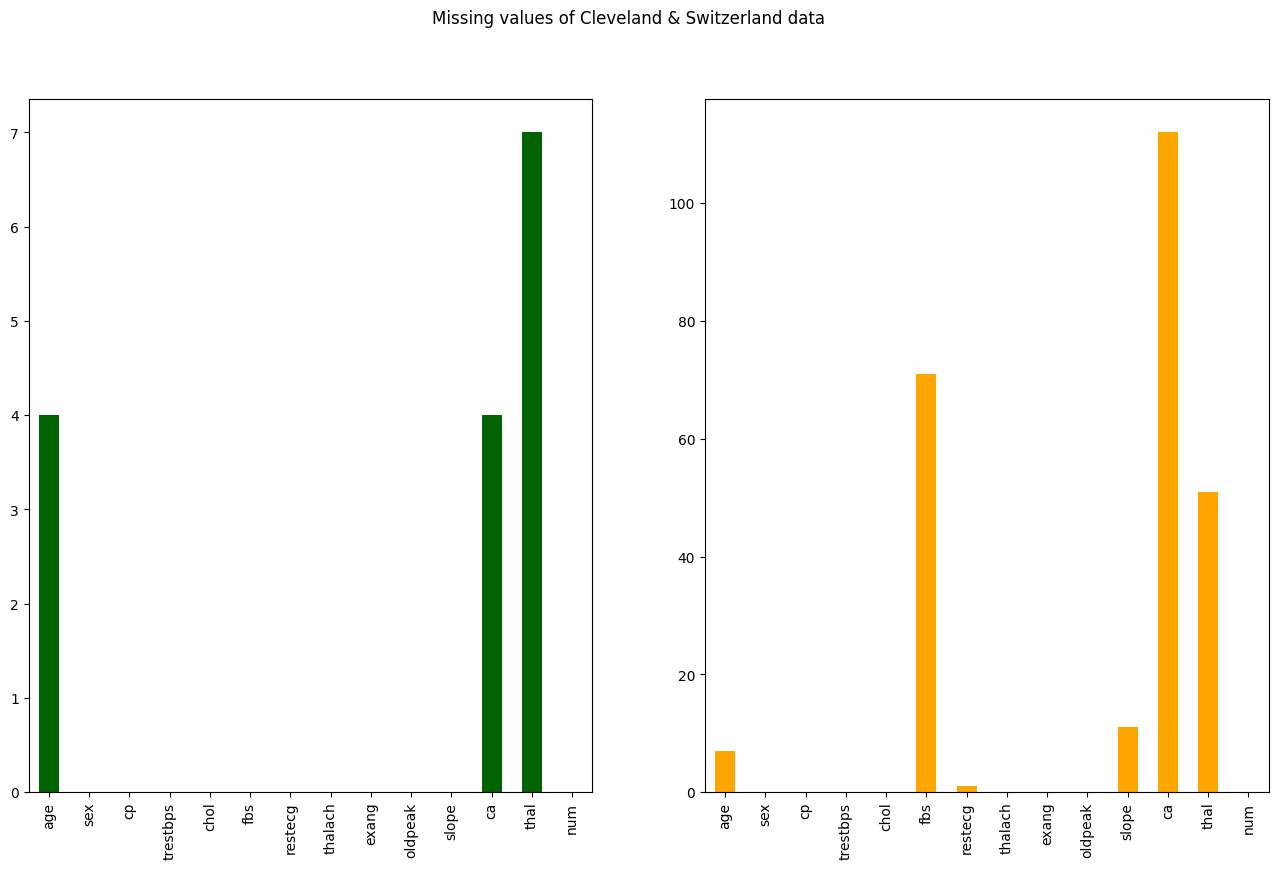

In [10]:

# Create 1 figure with a set of 2 subplots. Each axes should contain a figure as described below: 
# subplot 1: A barplot with the missing valies for each attribute in the dataset 'cleveland'
# subplot 2: A barplot with the missing valies for each attribute in the dataset 'test'

# Write your code here

fig, ax = plt.subplots(1, 2, figsize=(16, 9))

miss_cleveland.plot(kind='bar', ax=ax[0], color='darkgreen')
miss_test.plot(kind='bar', ax=ax[1], color='orange')

fig.suptitle('Missing values of Cleveland & Switzerland data')



## *3.* Imputing categorical variables

In the file 'data/heart-disease.names' you can find, together with the names of the columns, a description of their contents.

Determine which columns are categorical, and set their type to object.

Determine which columns are numerical, and set their type accordingly.

In [11]:
# cleveland.info()
# test.info()

categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_columns_int = ['num']
numerical_columns_float = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

cleveland[categorical_columns] = cleveland[categorical_columns].astype('object')
test[categorical_columns] = test[categorical_columns].astype('object')

# Verify the type changes: 
cleveland.dtypes


age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

### ` Task: Split the cleveland dataframe in a train and a validation set. `

The train set must be called train, the the validation set must be called val. The size of the validation set must be 30% of the total size of the cleveland dataframe. Use shuffle=True and stratify=True. Make sure that both train and val are dataframes, and that the columns have the correct names. Reset the indexes of all four the dataframes, using drop=True.

In [12]:
# your original code: 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd


X_cleveland = cleveland.drop(columns=["num"]) 
y_cleveland = cleveland["num"]

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_cleveland, y_cleveland, test_size=0.3, shuffle=True, stratify=y_cleveland
)

# Combine features and target for train and validation sets
train = X_train.assign(num=y_train.values)
val = X_val.assign(num=y_val.values)

# Reset the indexes of train and val dataframes
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)


In [13]:
# DO NOT DELETE/CHANGE THIS CELL
X_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
292,44.0,1.0,4.0,120.0,169.0,0.0,0.0,144.0,1.0,2.8,3.0,0.0,6.0
260,44.0,0.0,3.0,118.0,242.0,0.0,0.0,149.0,0.0,0.3,2.0,1.0,3.0
70,65.0,0.0,3.0,155.0,269.0,0.0,0.0,148.0,0.0,0.8,1.0,0.0,3.0
259,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0


In [14]:
# DO NOT DELETE/CHANGE THIS CELL
X_val.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
120,48.0,1.0,4.0,130.0,256.0,1.0,2.0,150.0,1.0,0.0,1.0,2.0,7.0
67,54.0,1.0,3.0,150.0,232.0,0.0,2.0,165.0,0.0,1.6,1.0,0.0,7.0
72,62.0,1.0,4.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2.0,7.0
172,59.0,0.0,4.0,174.0,249.0,0.0,0.0,143.0,1.0,0.0,2.0,0.0,3.0
250,57.0,1.0,4.0,110.0,201.0,0.0,0.0,126.0,1.0,1.5,2.0,0.0,6.0


In [15]:
# To make the classification task easier, transform the target variable into a binary variable.
# If the target variable is 0, it should remain 0. If the target variable is different from 0, it should be transformed into 1.
y_train = pd.DataFrame((y_train != 0).astype(int), columns=["num"])
y_val = pd.DataFrame((y_val != 0).astype(int), columns=["num"])
y_test = pd.DataFrame((test["num"] != 0).astype(int), columns=["num"])


In [16]:
# DO NOT DELETE/CHANGE THIS CELL

'''
train_set_from_franco = pd.read_csv('../../../testing_data/train.csv')
val_set_from_franco = pd.read_csv('../../../testing_data/val.csv')

assert train.equals(train_set_from_franco), 'train set is not correct'
assert val.equals(val_set_from_franco), 'validation set is not correct'
'''


"\ntrain_set_from_franco = pd.read_csv('../../../testing_data/train.csv')\nval_set_from_franco = pd.read_csv('../../../testing_data/val.csv')\n\nassert train.equals(train_set_from_franco), 'train set is not correct'\nassert val.equals(val_set_from_franco), 'validation set is not correct'\n"

### ` Task: impute the missing values in the categorical columns. Use a KNNImputer from sklearn for the imputation process. `

In [17]:


# 1. Create a subset of the train dataset with only the categorical columns. Call this subset train_cat.
# 2. Create a subset of the val dataset with only the categorical columns. Call this subset val_cat.
# 3. Create a subset of the test dataset with only the categorical columns. Call this subset test_cat
# 4. Impute the three datasets using a KNN imputer with k=5 and weights set to distance
# 5. Save the results in train_imputed_knn, val_imputed_knn, and test_imputed_knn.
# 6. Make sure to add the column names to the resulting dataframes. DO NOT SKIP THIS STEP.
# The new values might have new values that are not in the original dataset.
# Approximate them to the nearest value in the original dataset, for each column.
# To do so, you can store the original values of each column in a dictionary or a list.
# if a new value is equidistant from two original values, choose the largest one.
# (Example: if the original values are [1, 3] and the new value is 2, it will become 3)

from sklearn.impute import KNNImputer


# Step 1-3
train_cat = train[categorical_columns]
val_cat = val[categorical_columns]
test_cat = test[categorical_columns]
                                  
train_cat_encoded = train_cat.apply(lambda x: x.astype('category').cat.codes)
val_cat_encoded = val_cat.apply(lambda x: x.astype('category').cat.codes)
test_cat_encoded = test_cat.apply(lambda x: x.astype('category').cat.codes)

#  Step 4
knn_imputer = KNNImputer(n_neighbors=5, weights='distance')

# Step 5 and 6
train_imputed_knn = pd.DataFrame(knn_imputer.fit_transform(train_cat), columns=train_cat.columns)
val_imputed_knn = pd.DataFrame(knn_imputer.transform(val_cat), columns=val_cat.columns)
test_imputed_knn = pd.DataFrame(knn_imputer.transform(test_cat), columns=test_cat.columns)

# Test the results
# print(train_imputed_knn.head(3))
# print(val_imputed_knn.head(3))
# print(test_imputed_knn.head(3))

# The new values might have new values that are not in the original dataset.
# Approximate them to the nearest value in the original dataset, for each column.
# To do so, you can store the original values of each column in a dictionary or a list.
# if a new value is equidistant from two original values, choose the largest one.

original_values = {col: sorted(train_cat_encoded[col].dropna().unique()) for col in train_cat_encoded.columns}


def approximate_to_nearest(original_values, imputed_values):
    """
    Parameters:
    -----------
    original_values : dict
        A dictionary where the keys are column names, and the values are sorted lists
        of unique numeric values present in the original dataset for each column. 
        These values represent the valid numeric codes for the categorical features.
    
    imputed_values : pd.DataFrame
        A DataFrame containing the imputed values (from KNN imputation) for 
        categorical features. These values will be approximated to the nearest valid
        value from the `original_values` dictionary.

    Returns:
    --------
    pd.DataFrame
        A DataFrame with the imputed values replaced by the closest valid values 
        from the original dataset for each categorical feature.
    """
    def find_nearest(original_list, value):
        
        original_array = np.array(original_list, dtype=float)  # Ensuring numeric dtype
        abs_diff = np.abs(original_array - value)
        
        # Find the index of the closest value
        idx_min = np.argmin(abs_diff)
        
        # If equidistant, choose the larger value
        if (idx_min > 0) and (abs_diff[idx_min] == abs_diff[idx_min - 1]):
            return original_array[idx_min]
        
        return original_array[idx_min]
    
    # Apply the approximation to each column
    for col in imputed_values.columns:
        imputed_values[col] = imputed_values[col].apply(lambda x: find_nearest(original_values[col], x))
    
    return imputed_values


train_imputed_knn = approximate_to_nearest(original_values, train_imputed_knn.copy())
val_imputed_knn = approximate_to_nearest(original_values, val_imputed_knn.copy())
test_imputed_knn = approximate_to_nearest(original_values, test_imputed_knn.copy())

# Check the results
# print(train_imputed_knn.head())
# print(val_imputed_knn.head())
# print(test_imputed_knn.head())



In [18]:
# DO NOT DELETE/CHANGE THIS CELL
'''
train_imp_knn_franco = pd.read_csv('../../../testing_data/train_imp_knn.csv')
val_imp_knn_franco = pd.read_csv('../../../testing_data/val_imp_knn.csv')
test_imp_knn_franco = pd.read_csv('../../../testing_data/test_imp_knn.csv')

assert train_imputed_knn.equals(train_imp_knn_franco), 'train imputed knn is not correct'
assert val_imputed_knn.equals(val_imp_knn_franco), 'val imputed knn is not correct'
assert test_imputed_knn.equals(test_imp_knn_franco), 'test imputed knn is not correct'
'''

"\ntrain_imp_knn_franco = pd.read_csv('../../../testing_data/train_imp_knn.csv')\nval_imp_knn_franco = pd.read_csv('../../../testing_data/val_imp_knn.csv')\ntest_imp_knn_franco = pd.read_csv('../../../testing_data/test_imp_knn.csv')\n\nassert train_imputed_knn.equals(train_imp_knn_franco), 'train imputed knn is not correct'\nassert val_imputed_knn.equals(val_imp_knn_franco), 'val imputed knn is not correct'\nassert test_imputed_knn.equals(test_imp_knn_franco), 'test imputed knn is not correct'\n"

## *4.* Imputing numerical variables

### ` Task: impute the missing values in the numerical columns. Use a Lasso Regression from sklearn for the imputation process. `
If more than one column contains missing values, proceed in increasing order: the lowest number of missing values first, then the second lowest, then the third ...

Exclude the columns with missing values when fitting your regressor: only train on columns without missing values. After a column has been imputed, it can be used to fit the regressor in the next step.

In [19]:

# 1. Create a subset of the train dataset with only the numerical columns. Call this subset train_num.
# 2. Create a subset of the val dataset with only the numerical columns. Call this subset val_num.
# 3. Create a subset of the test dataset with only the numerical columns. Call this subset test_num.
# 4a. Create a subset of train_num containing the rows with missing values. Call this subset train_num_missing.
# 4b. Create a subset of train_num containing the rows without missing values. Call this subset train_num_not_missing.
# 5a. Create a subset of val_num containing the rows with missing values. Call this subset val_num_missing.
# 5b. Create a subset of val_num containing the rows without missing values. Call this subset val_num_not_missing.
# 6a. Create a subset of test_num containing the rows with missing values. Call this subset test_num_missing.
# 6b. Create a subset of test_num containing the rows without missing values. Call this subset test_num_not_missing.
# 7. Using a Lasso regression, impute the missing values in train_num_missing, val_num_missing, and test_num_missing.
# On what should the Lasso regression be trained?
# 8. Repeat steps 1-7 until all the missing values are imputed.
# 9. Save the results in train_num_imputed_lasso, val_num_imputed_lasso, and test_num_imputed_lasso.
# 10. Concatenate the imputed subsets with the subsets that did not contain missing values.
# 11. Save the resulting datasets in train_imputed_lasso, val_imputed_lasso, and test_imputed_lasso.
# IMPORTANT: The order of the rows should be the same as in the original datasets.

# Step 1-3
train_num = train[numerical_columns_float]
val_num = val[numerical_columns_float]
test_num = test[numerical_columns_float]

def split_missing_data(df):
    missing_rows = df[df.isna().any(axis=1)]
    not_missing_rows = df.dropna() 
    return missing_rows, not_missing_rows

print("Lengths of *_num: ", len(train_num), len(val_num), len(test_num))

# Step 4, 5, 6
train_num_missing, train_num_not_missing = split_missing_data(train_num)
val_num_missing, val_num_not_missing = split_missing_data(val_num)
test_num_missing, test_num_not_missing = split_missing_data(test_num)

# Get some information about the missing values 
print("Amount of missing ages per dataset: ", train_num['age'].isna().sum(), val_num['age'].isna().sum(), test_num['age'].isna().sum())
print("Lengths of *_num_missign: ", len(train_num_missing), len(val_num_missing), len(test_num_missing))
print("Lengths of *_num_not_missign: ", len(train_num_not_missing), len(val_num_not_missing), len(test_num_not_missing))

# Check the amount of missing values overall
missing_counts_train = train_num.isna().sum().sort_values()
missing_counts_val = val_num.isna().sum().sort_values()
missing_counts_test = test_num.isna().sum().sort_values()
print("Missing counts for train, val, test: \n", missing_counts_train, missing_counts_val, missing_counts_test)

# We can see that only ages are missing -> only this row needs imputation which is advantageous 

Lengths of *_num:  212 91 117
Amount of missing ages per dataset:  4 0 7
Lengths of *_num_missign:  4 0 7
Lengths of *_num_not_missign:  208 91 110
Missing counts for train, val, test: 
 trestbps    0
chol        0
thalach     0
oldpeak     0
age         4
dtype: int64 age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64 trestbps    0
chol        0
thalach     0
oldpeak     0
age         7
dtype: int64


In [20]:
from sklearn.linear_model import Lasso
# 7. Using a Lasso regression, impute the missing values in train_num_missing, val_num_missing, and test_num_missing.
# On what should the Lasso regression be trained?
# 8. Repeat steps 1-7 until all the missing values are imputed.
# 9. Save the results in train_num_imputed_lasso, val_num_imputed_lasso, and test_num_imputed_lasso.
# 10. Concatenate the imputed subsets with the subsets that did not contain missing values.
# 11. Save the resulting datasets in train_imputed_lasso, val_imputed_lasso, and test_imputed_lasso.
# IMPORTANT: The order of the rows should be the same as in the original datasets.

def lasso_impute(train_data, missing_data, update_train_data=True):
    # Copy data to avoid modifying originals
    train_data = train_data.copy()
    missing_data = missing_data.copy()
    
    # While there are missing values
    while missing_data.isnull().values.any():
        # Get columns with missing values
        cols_with_missing = missing_data.columns[missing_data.isnull().any()].tolist()
        #print("cols with missing values: ", cols_with_missing)
        # Sort columns by the number of missing values
        missing_counts = missing_data[cols_with_missing].isnull().sum().sort_values()
        cols_sorted = missing_counts.index.tolist()
        
        for col in cols_sorted:
            # Prepare training data (use non-missing rows)
            X_train = train_data.drop(columns=[col]).dropna()
            y_train = train_data.loc[X_train.index, col]
            y_train = y_train.dropna()
            X_train = X_train.loc[y_train.index]
            # index = missing_data[missing_data['age'].isna()]
            # print(index)
            # Prepare prediction data
            X_pred = missing_data.loc[missing_data[col].isnull(), X_train.columns]
            # Drop rows with missing values in X_pred
            X_pred = X_pred.dropna()
            
            # If no data to train or predict, continue to next column
            if X_train.empty or X_pred.empty:
                continue
            
            # Fit Lasso regression
            lasso = Lasso()
            lasso.fit(X_train, y_train)
            
            # Predict missing values
            y_pred = lasso.predict(X_pred)
            # Impute the predicted values
            missing_data.loc[X_pred.index, col] = y_pred
            
            if update_train_data:
                # Assign imputed values back to train_data
                train_data.loc[X_pred.index, col] = y_pred
                
                # Remove imputed rows from missing_data
                missing_data = missing_data.drop(index=X_pred.index)
    
    if update_train_data:
        return train_data
    else:
        return missing_data

# Step 9: 

# Use the entire train_num as train_data
train_num_imputed_lasso = lasso_impute(train_num, train_num_missing, update_train_data=True)

# For val and test, use the imputed train data to train the lasso function on 
val_num_imputed_lasso = lasso_impute(train_num_imputed_lasso, val_num_missing, update_train_data=False)
test_num_imputed_lasso = lasso_impute(train_num_imputed_lasso, test_num_missing, update_train_data=False)
#print("Validation:", val_num_imputed_lasso['age'].isna().sum())


In [21]:
# Added this cell to split the computation of the Lasso and the order of the cells for easier reading 
# IMPORTANT: The order of the rows should be the same as in the original datasets.

# For train set
train_imputed_lasso = train.copy()
train_imputed_lasso[numerical_columns_float] = train_num_imputed_lasso[numerical_columns_float]

# For validation set
val_imputed_lasso = val.copy()
nan_rows = val_imputed_lasso[val_imputed_lasso['age'].isna()]
val_imputed_lasso.loc[val_num_imputed_lasso.index, numerical_columns_float] = val_num_imputed_lasso[numerical_columns_float]

# For test set
test_imputed_lasso = test.copy()
test_imputed_lasso.loc[test_num_imputed_lasso.index, numerical_columns_float] = test_num_imputed_lasso[numerical_columns_float]

# Sanity checks: 

assert train_imputed_lasso.index.equals(train.index)
assert val_imputed_lasso.index.equals(val.index)
assert test_imputed_lasso.index.equals(test.index)
# Check if 'num' has any missing values
print("Missing values in 'age' after imputation:")
print("Train:", train_num_imputed_lasso['age'].isna().sum())
print("Validation:", val_num_imputed_lasso['age'].isna().sum())
print("Test:", test_num_imputed_lasso['age'].isna().sum())

"""
More sanity checks: 
missing_counts_train = train_num_imputed_lasso[numerical_columns_float].isna().sum().sort_values()
missing_counts_val = val_num_imputed_lasso[numerical_columns_float].isna().sum().sort_values()
missing_counts_test = test_num_imputed_lasso[numerical_columns_float].isna().sum().sort_values()
print("Missing counts for train, val, test: \n", missing_counts_train, missing_counts_val, missing_counts_test)
"""

Missing values in 'age' after imputation:
Train: 0
Validation: 0
Test: 0


'\nMore sanity checks: \nmissing_counts_train = train_num_imputed_lasso[numerical_columns_float].isna().sum().sort_values()\nmissing_counts_val = val_num_imputed_lasso[numerical_columns_float].isna().sum().sort_values()\nmissing_counts_test = test_num_imputed_lasso[numerical_columns_float].isna().sum().sort_values()\nprint("Missing counts for train, val, test: \n", missing_counts_train, missing_counts_val, missing_counts_test)\n'

In [22]:
# DO NOT DELETE/CHANGE THIS CELL
'''
train_imp_lasso_franco = pd.read_csv('../../../testing_data/train_imp_lasso.csv')
val_imp_lasso_franco = pd.read_csv('../../../testing_data/val_imp_lasso.csv')
test_imp_lasso_franco = pd.read_csv('../../../testing_data/test_imp_lasso.csv')

assert train_imputed_lasso.equals(train_imp_lasso_franco), 'train imputed lasso is not correct'
assert val_imputed_lasso.equals(val_imp_lasso_franco), 'val imputed lasso is not correct'
assert test_imputed_lasso.equals(test_imp_lasso_franco), 'test imputed lasso is not correct'
'''

"\ntrain_imp_lasso_franco = pd.read_csv('../../../testing_data/train_imp_lasso.csv')\nval_imp_lasso_franco = pd.read_csv('../../../testing_data/val_imp_lasso.csv')\ntest_imp_lasso_franco = pd.read_csv('../../../testing_data/test_imp_lasso.csv')\n\nassert train_imputed_lasso.equals(train_imp_lasso_franco), 'train imputed lasso is not correct'\nassert val_imputed_lasso.equals(val_imp_lasso_franco), 'val imputed lasso is not correct'\nassert test_imputed_lasso.equals(test_imp_lasso_franco), 'test imputed lasso is not correct'\n"

## *5.* Classification with Decision Tree, using a single split 

In [23]:
# Merge the train_imputed_knn and train_imputed_lasso datasets. Call the resulting dataset X_train_imputed.

X_train_imputed = pd.concat([train_imputed_knn, train_imputed_lasso], axis=1)
# Merge the val_imputed_knn and val_imputed_lasso datasets. Call the resulting dataset X_val_imputed.
X_val_imputed = pd.concat([val_imputed_knn, val_imputed_lasso], axis=1)
# Merge the test_imputed_knn and test_imputed_lasso datasets. Call the resulting dataset X_test_imputed.
X_test_imputed = pd.concat([test_imputed_knn, test_imputed_lasso], axis=1)

# drop the num column such that the datasets can be used for training 
X_train_imputed = X_train_imputed.drop(columns=['num'])
X_val_imputed = X_val_imputed.drop(columns=['num'])
X_test_imputed = X_test_imputed.drop(columns=['num'])

# Sanity checks: 

assert len(X_train_imputed) == (len(train))
assert len(X_val_imputed) == (len(val))
assert len(X_test_imputed) == (len(test))


### ` Task: Train a set of Decision Trees, using different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [24]:
# 1. Create a dictionary to contain the hyperparameters. The dictionary should contain the following:
# - criterion: 'gini' and 'entropy'
# - max_depth: 3, 5, and 7
# - min_samples_split: 2, 5, and 10
# 2. Create a dictionary called performance to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the hyperparameters from the dictionary.
# 4. Create a for loop to iterate over the combinations of hyperparameters.
# 5. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation set.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary.

from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import f1_score
import time

# Step 1
hyperparameters = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']} 
# Step 2
performance = {}
# Step 3
param_grid = ParameterGrid(hyperparameters)

start = time.time() # DO NOT CHANGE/DELETE THIS LINE
# Step 4
for i, parameter_tree_combination in enumerate(param_grid):
    # Step 5.1
    tree = DT(**parameter_tree_combination)
    # Step 5.2
    tree.fit(X_train_imputed, y_train)
    # Step 5.3 predict the target variable for the validation set 
    y_tree = tree.predict(X_val_imputed)
    # Step 5.4 Calculate the F1 score of the model
    f1 = f1_score(y_val, y_tree, average='macro')
    # Step 5.5 Use index 'i' as the key to add the F1 score to the perfomance dictionary 
    performance[i] = {
        'parameters': parameter_tree_combination,
        'f1_score': f1
    }

end = time.time() # DO NOT CHANGE/DELETE THIS LINE

print('Time elapsed to run the hyperparameter tuning with a single split: ', end - start) # DO NOT CHANGE/DELETE THIS LINE

Time elapsed to run the hyperparameter tuning with a single split:  0.05556511878967285


In [25]:
# select the best performing hyperparameters
best_index = max(performance, key=lambda i: performance[i]['f1_score'])  

best_hyperparameters = performance[best_index]['parameters']  

best_hyperparameters

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [26]:
# Concatenate the train and validation datasets. Call the resulting datasets X and y.
X = pd.concat([X_train_imputed, X_val_imputed])
y = pd.concat([y_train, y_val])

# Create a DecisionTreeClassifier with the best hyperparameters.
best_params = {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
tree = DT(**best_params)

# Fit the model on the X and y datasets.
tree.fit(X, y)

# Predict the target variable for the test dataset.
y_test_pred = tree.predict(X_test_imputed)

# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_single_split.
f1_test_single_split = f1_score(y_test, y_test_pred, average='macro')
# print(f1_test_single_split)


0.5544354838709677


In [27]:
f1_test_single_split # DO NOT DELETE/CHANGE THIS LINE

np.float64(0.5544354838709677)

## *6.* Classification with Decision Tree using Cross Validation

### ` Task: Train a cross-validation object, then train a decision tree using cross-validation and different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [28]:
# 1. Use the same hyperparameters from the previous task which is: 
# {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
# 2. Create a StratifiedKFold object with 5 splits, use shuffle=True.
# 3. Create a dictionary called performance_CV to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the usual hyperparameters.
# 4. Create a for loop to iterate over the folds of the StratifiedKFold.
# 5. For each fold, create a for loop to iterate over the combinations of hyperparameters.
# 6. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation fold.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary. Each hyperparameter combination may have multiple F1 scores.

from sklearn.model_selection import StratifiedKFold
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier

X = pd.concat([X_train_imputed, X_val_imputed])
y = pd.concat([y_train, y_val])

# DO NOT FORGET TO DELETE THE PREVIOUS LINES. They are only to make the empty assignment run without errors,
# but they will destroy the data you need.

# Step 1
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
# Step 2
CV = StratifiedKFold(n_splits=5, shuffle=True)
# Step 3
performance_CV = defaultdict(list)
param_grid = ParameterGrid(hyperparameters)

start_CV = time.time() # DO NOT CHANGE/DELETE THIS LINE

# Step 4
for i, (train_index, val_index) in enumerate(CV.split(X, y)):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # 5. For each fold, create a for loop to iterate over the combinations of hyperparameters.
    for params in param_grid:
        # Step 6
        # Create a DecisionTreeClassifier with the hyperparameters for that iteration.
        tree = DecisionTreeClassifier(**params)
        # Fit the model.
        tree.fit(X_train_fold, y_train_fold)
        # Predict the target variable for the validation fold.
        y_pred = tree.predict(X_val_fold)
        # Calculate the F1 score.
        f1 = f1_score(y_val_fold, y_pred, average='macro')
        # print(f"F1 = {f1} for params: {params}")
        # Add the hyperparameters and the F1 score to the performance dictionary.
        params_key = tuple(sorted(params.items()))
        # print("params key: ", params_key)
        performance_CV[params_key].append(f1)

end_CV = time.time() # DO NOT CHANGE/DELETE THIS LINE

print('Time elapsed to run the hyperparameter tuning with Cross Validation: ', end_CV - start_CV) # DO NOT CHANGE/DELETE THIS LINE


Time elapsed to run the hyperparameter tuning with Cross Validation:  0.30755090713500977


In [29]:
# select the best performing hyperparameters, which are the ones with the highest average F1 score
best_hyperparameters_CV = max(performance_CV, key=lambda params: np.mean(performance_CV[params]))

best_hyperparameters_CV # DO NOT DELETE/CHANGE THIS LINE

(('criterion', 'entropy'), ('max_depth', 3), ('min_samples_split', 2))

In [30]:
# Create a DecisionTreeClassifier with the best hyperparameters.
# Fit the model on the X and y datasets.
best_params_dict = dict(best_hyperparameters_CV)
# Call the fitted model final_tree.
final_tree = DecisionTreeClassifier(**best_params_dict)

final_tree.fit(X, y)
# Predict the target variable for the test dataset.
y_test_pred = final_tree.predict(X_test_imputed)

# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_CV.
f1_test_CV = f1_score(y_test, y_test_pred, average='macro')


In [31]:
f1_test_CV # DO NOT DELETE/CHANGE THIS LINE

np.float64(0.5302197802197802)

## *7.* Interpretation of the results 

### ` Task: Look at the times elapsed to train the Decision Tree using the single split and the CV strategies. Is there a difference? Explain the difference or the lack of difference in 50 words or less. `

Time elapsed for single split: 0.06707382202148438, time elapsed for CV: 0.29927706718444824. This is nearly a 3 time increase in training time. Which is also resonable, as the CV strategy includes training 5 times as many decision trees. 

### ` Task: Plot final_tree, and explain which feature or combination of features is the most relevant for that model, in 50 words or less. `

You can find instructions on how to plot a decision tree at [this link](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py).

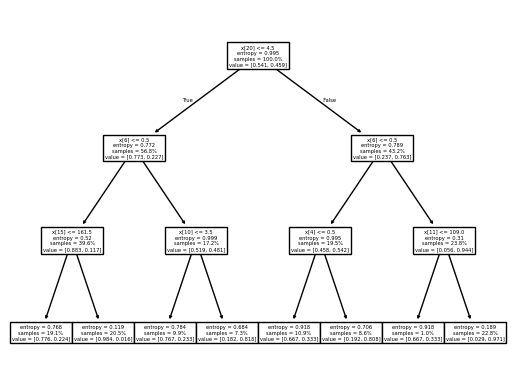

In [33]:

from sklearn import tree
tree.plot_tree(final_tree, proportion=True)
plt.show()

Write your explanation here. Delete this text.